In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from keras.callbacks import EarlyStopping
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from tabulate import tabulate
from src import camvid
from src import evaluate
from src import predict
from src.tiramisu import epi_approx_tiramisu
%matplotlib inline
plt.style.use('dark_background')

Using TensorFlow backend.


In [2]:
# the location to save fine training weights to
weights = 'models/Tiramisu103-CamVid11-fine.h5'

In [3]:
# the size to crop images to for fine tune training
crop_size = (352, 480)

In [4]:
camvid11 = camvid.CamVid(
    mapping=camvid.load_mapping(),
    target_size=(360, 480),
    crop_size=crop_size,
    horizontal_flip=True,
    ignored_labels=['Void'],
)
generators = camvid11.generators()

Found 367 images belonging to 1 classes.
Found 367 images belonging to 1 classes.
Found 101 images belonging to 1 classes.
Found 101 images belonging to 1 classes.
Found 233 images belonging to 1 classes.
Found 233 images belonging to 1 classes.


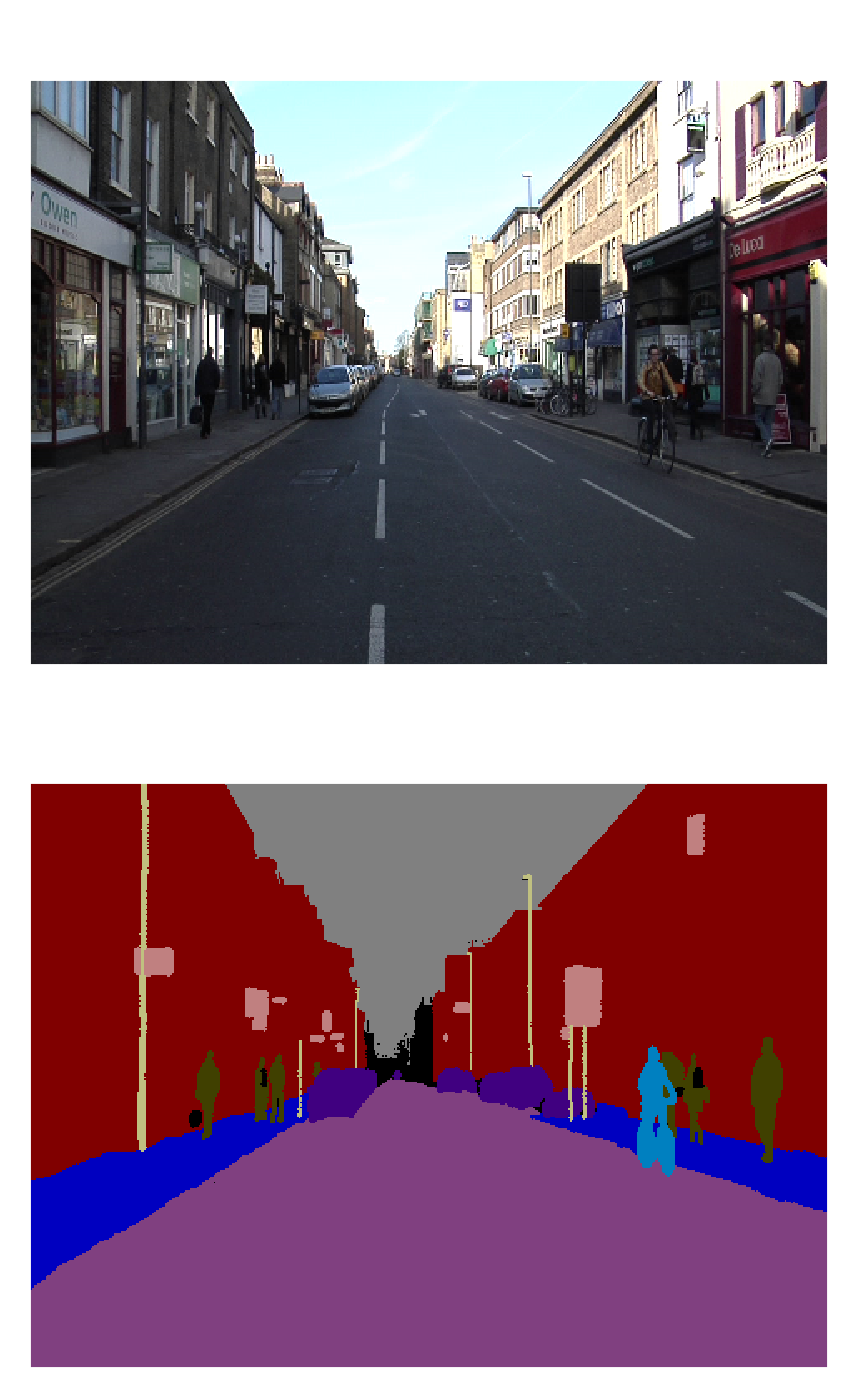

In [5]:
# get the next X, y training tuple
X, y = next(generators['train'])
# transform the onehot vector to an image
y = camvid11.unmap(y)
# plot the images
camvid.plot(X=X[0], y=y[0], order=['X', 'y'])

In [6]:
# build the model for the image shape and number of labels
model = epi_approx_tiramisu.epi_approx_tiramisu((*crop_size, 3), camvid11.n, class_weights=camvid11.class_mask)
model.layers[1].load_weights(weights)

/home/bitcommander/Documents/Projects/neural-semantic-segmentation/src/tiramisu/epi_approx_tiramisu.py:72: UserWarning: Output "entropy" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "entropy" during training.
  metrics={'tiramisu': [build_categorical_accuracy(weights=class_weights)]},


# Test Metrics

In [7]:
metrics = evaluate.evaluate(model, generators['test'], 233,
    mask=camvid11.class_mask, 
    label_map=camvid11.label_to_discrete_map
)
metrics

100%|██████████| 233/233 [01:07<00:00,  3.46step/s]


Test
Accuracy                 0.893862
Mean Per Class Accuracy  0.711854
Mean I/U                 0.551832
Bicyclist                0.283319
Building                 0.750997
Car                      0.628317
Column_Pole              0.299940
Fence                    0.179905
Pedestrian               0.390954
Road                     0.912808
Sidewalk                 0.796901
SignSymbol               0.209624
Sky                      0.917934
VegetationMisc           0.699451

In [8]:
print(tabulate(metrics, tablefmt='pipe', headers=('Metric', 'Value')))

| Metric                  |    Value |
|:------------------------|---------:|
| Accuracy                | 0.893862 |
| Mean Per Class Accuracy | 0.711854 |
| Mean I/U                | 0.551832 |
| Bicyclist               | 0.283319 |
| Building                | 0.750997 |
| Car                     | 0.628317 |
| Column_Pole             | 0.29994  |
| Fence                   | 0.179905 |
| Pedestrian              | 0.390954 |
| Road                    | 0.912808 |
| Sidewalk                | 0.796901 |
| SignSymbol              | 0.209624 |
| Sky                     | 0.917934 |
| VegetationMisc          | 0.699451 |


# Qualitative Results

## Train

In [9]:
X, y, p, s = predict.predict_epistemic(model, generators['train'], camvid11)

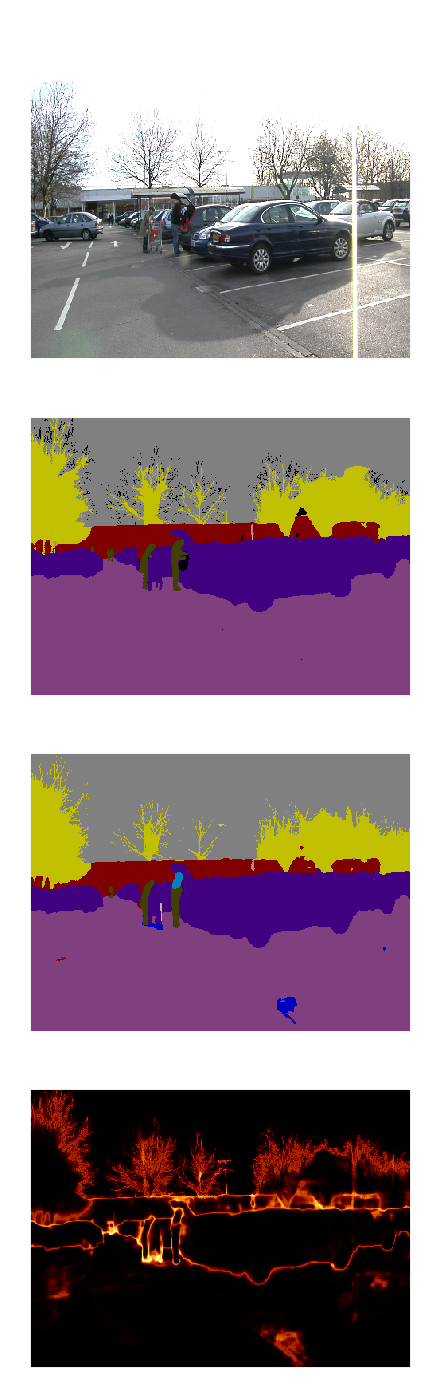

In [10]:
camvid.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])

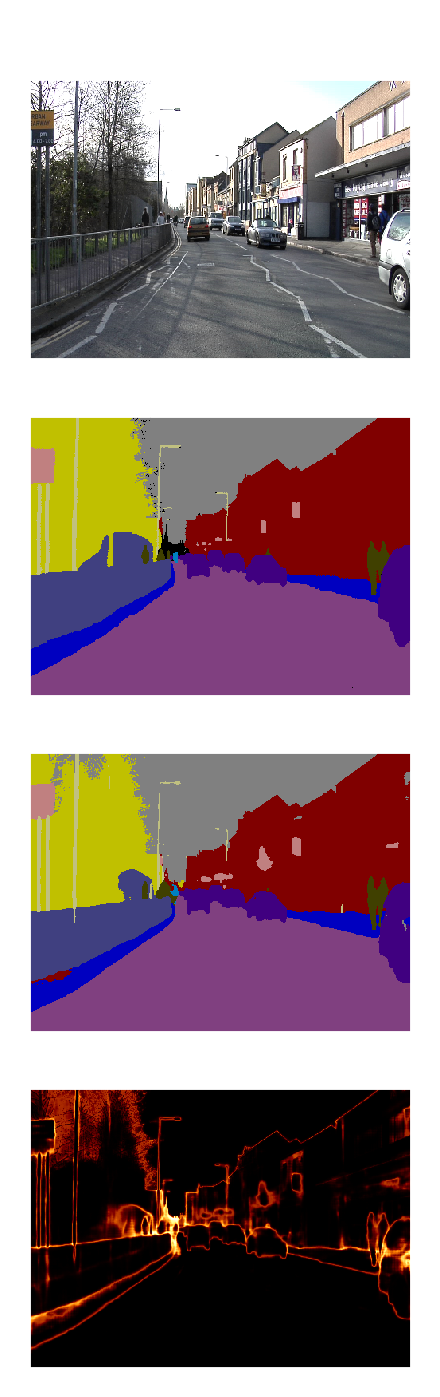

In [11]:
camvid.plot(X=X[1], y=y[1], y_pred=p[1], epistemic=s[1], order=['X', 'y', 'y_pred', 'epistemic'])

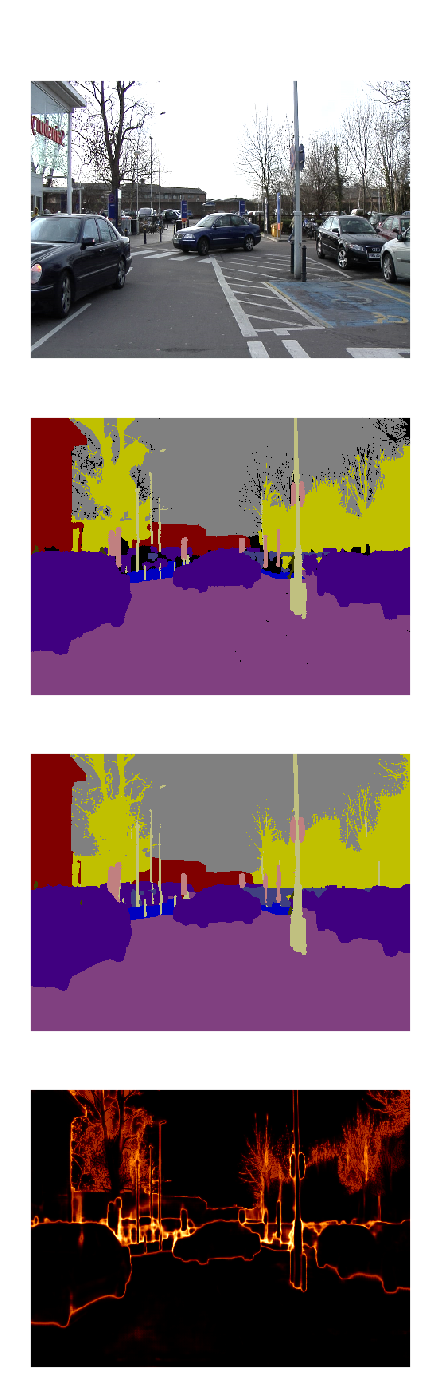

In [12]:
camvid.plot(X=X[2], y=y[2], y_pred=p[2], epistemic=s[2], order=['X', 'y', 'y_pred', 'epistemic'])

## Validation

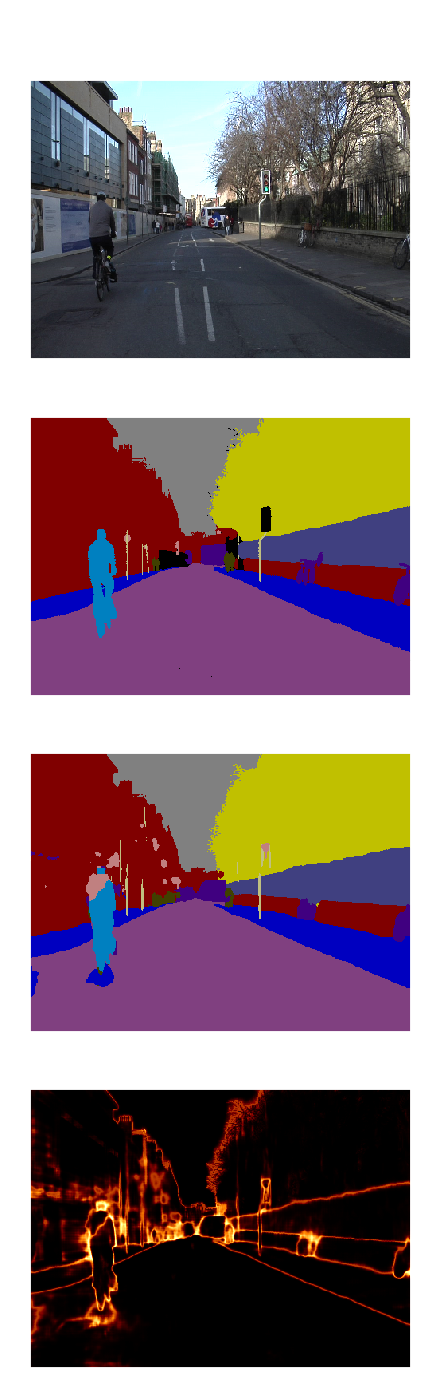

In [13]:
X, y, p, s = predict.predict_epistemic(model, generators['val'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])

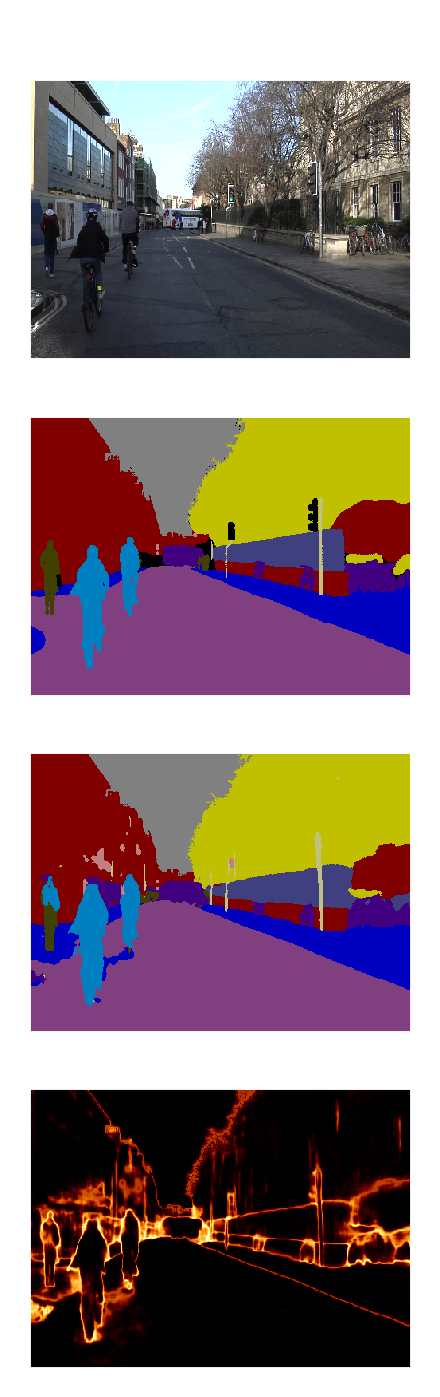

In [14]:
X, y, p, s = predict.predict_epistemic(model, generators['val'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])

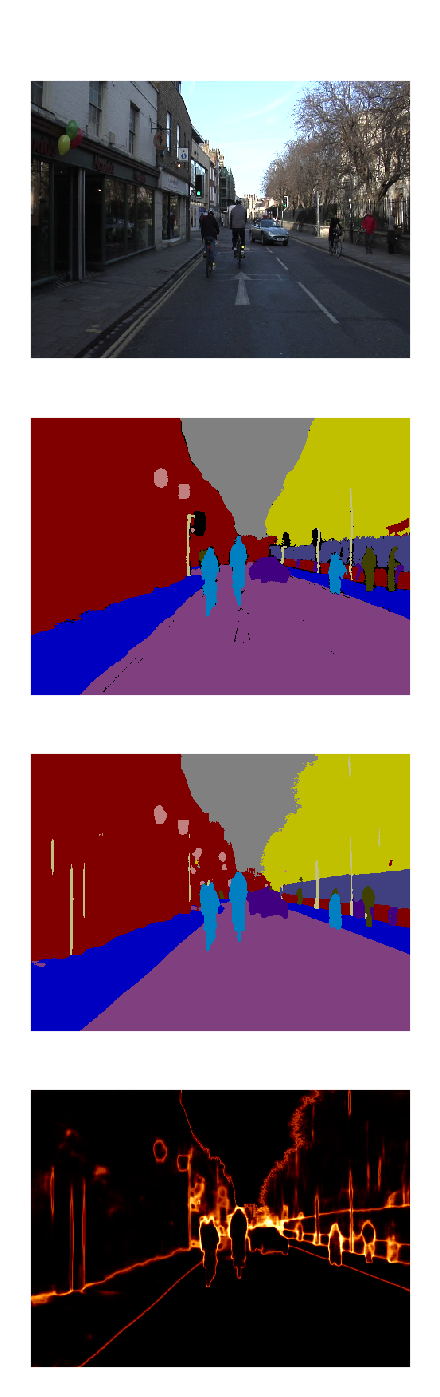

In [15]:
X, y, p, s = predict.predict_epistemic(model, generators['val'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])

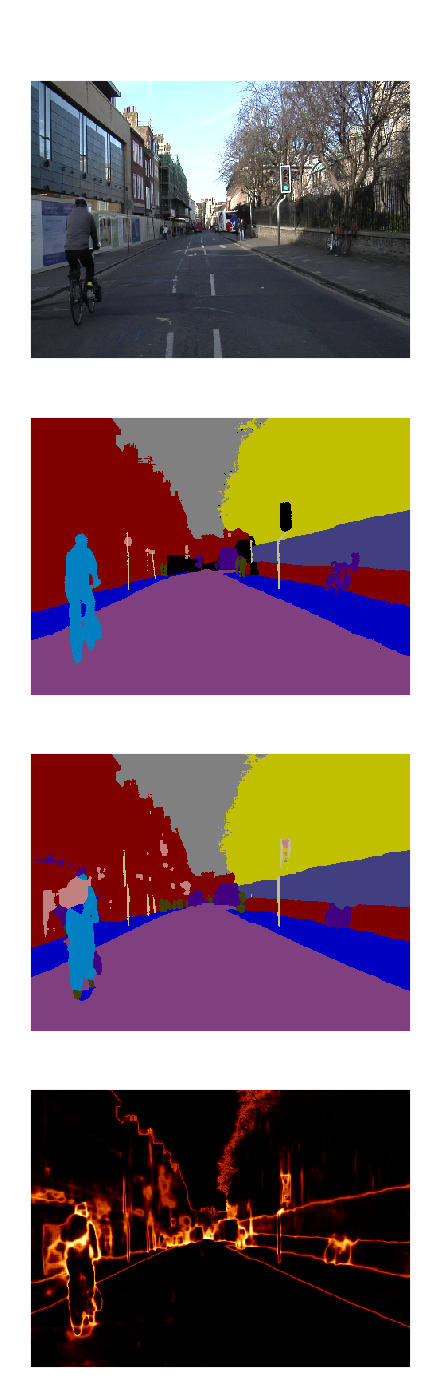

In [16]:
X, y, p, s = predict.predict_epistemic(model, generators['val'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])

## Test

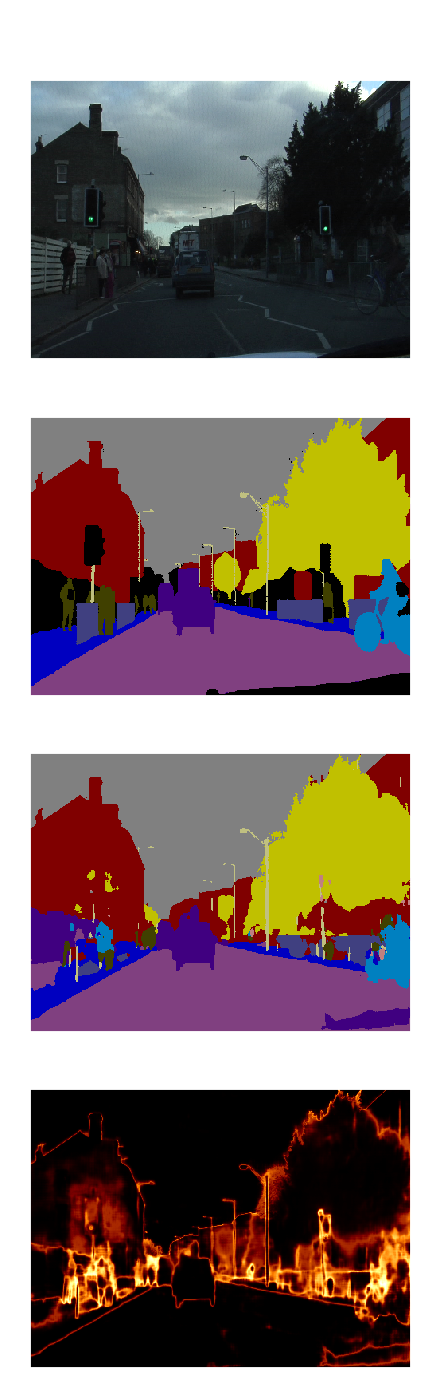

In [17]:
X, y, p, s = predict.predict_epistemic(model, generators['test'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])

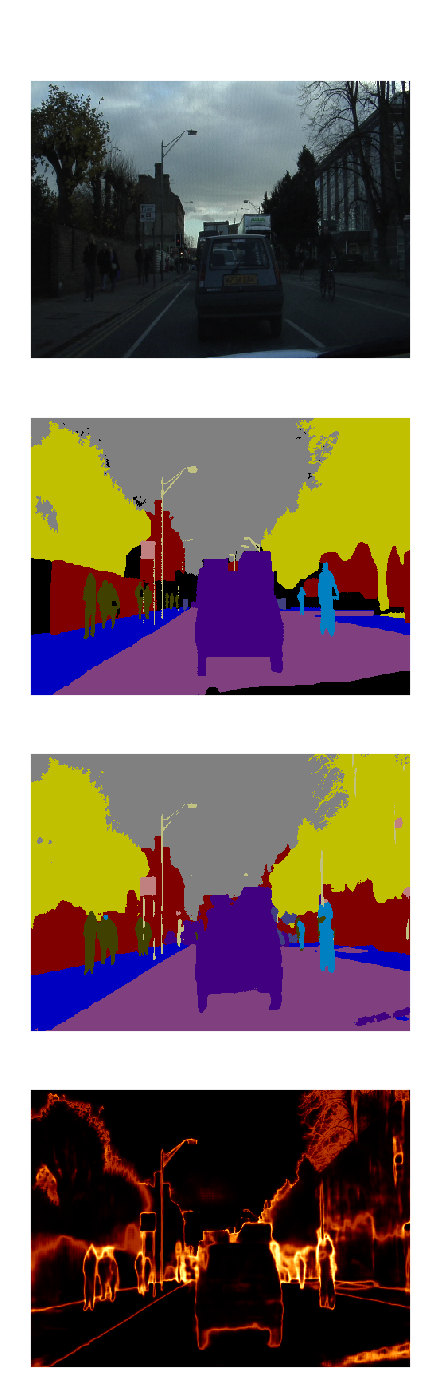

In [18]:
X, y, p, s = predict.predict_epistemic(model, generators['test'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])

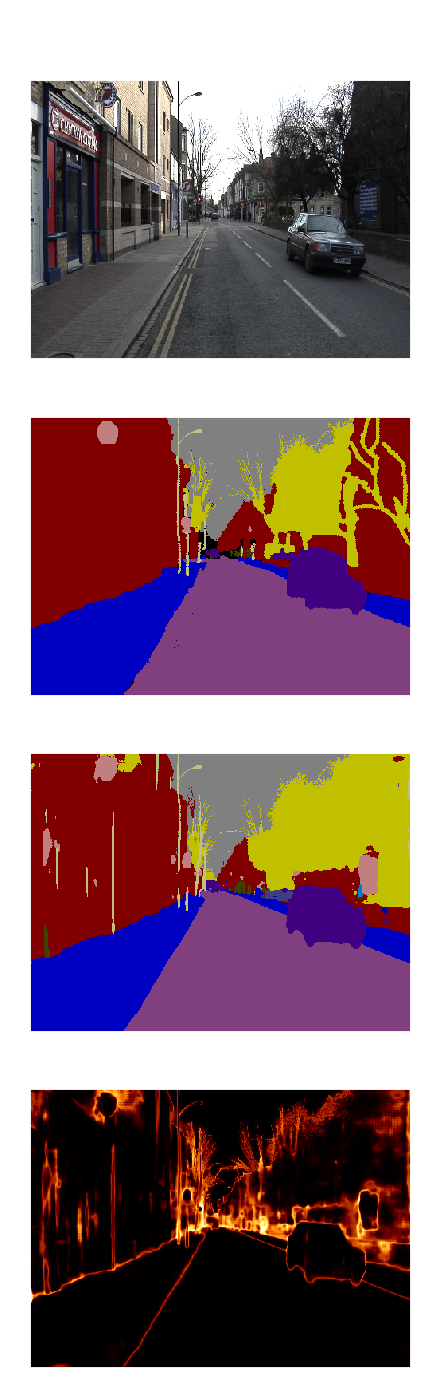

In [19]:
X, y, p, s = predict.predict_epistemic(model, generators['test'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])

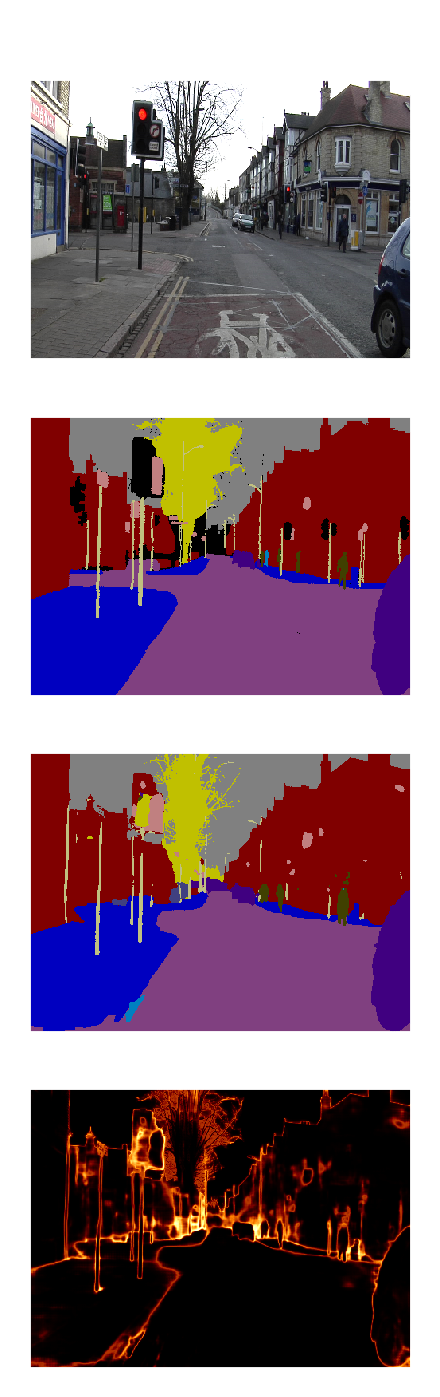

In [20]:
X, y, p, s = predict.predict_epistemic(model, generators['test'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], epistemic=s[0], order=['X', 'y', 'y_pred', 'epistemic'])